# Gender Classification using Vocal Features and K-Nearest Neighbors

---


<p align="justify">This analysis explores the use of machine learning, specifically the K-Nearest Neighbors algorithm, to classify gender based on vocal features. The objective of this analysis is to build and evaluate a model that can accurately predict an individual's gender using acoustic properties extracted from their voice.

<p align="justify">By analyzing various vocal characteristics, the model aims to identify patterns and relationships that distinguish between male and female voices, ultimately enabling accurate gender classification. This analysis will involve data preprocessing, model training, and evaluation using metrics such as accuracy and confusion matrix to assess the performance and reliability of the developed model.


---

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

## Load Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/datasets/vocal_gender_features.csv')

In [3]:
df.head()

,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
0,2247.331739,1158.537748,1870.415462,370.405241,21.440710,0.036879,4419.438073,0.169241,0.082552,1592.1033,...,21.736240,2.303085,8.983318,-17.410305,9.115154,0.301804,10.452693,-3.080832,10.146248,0
1,1790.719889,996.554825,1757.898617,410.710318,21.513383,0.018936,3635.742188,0.108068,0.055477,1112.6351,...,13.937135,-0.953942,10.831742,-0.088775,10.297690,-7.281142,10.926579,-0.450248,8.489134,0
2,1977.923363,1010.148667,1747.099555,461.458379,20.476283,0.032616,3873.291016,0.144633,0.060388,1557.5225,...,14.900779,0.260098,14.031009,-0.420670,10.810292,-0.199829,11.986182,3.372986,9.285437,0
3,2037.765550,1311.440630,1745.224852,419.056484,19.516014,0.028482,3826.584507,0.148933,0.029559,1481.0868,...,15.957924,-1.486122,14.461978,-8.479608,12.550333,3.997028,9.912608,-6.946966,10.574301,0
4,1739.383829,1092.623322,1623.135563,450.088465,20.260620,0.025737,3452.903892,0.117961,0.069078,1424.5352,...,15.105562,-3.366364,13.943447,-6.561539,11.944948,1.410639,13.110976,-3.252258,9.866687,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16148 entries, 0 to 16147
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_spectral_centroid   16148 non-null  float64
 1   std_spectral_centroid    16148 non-null  float64
 2   mean_spectral_bandwidth  16148 non-null  float64
 3   std_spectral_bandwidth   16148 non-null  float64
 4   mean_spectral_contrast   16148 non-null  float64
 5   mean_spectral_flatness   16148 non-null  float64
 6   mean_spectral_rolloff    16148 non-null  float64
 7   zero_crossing_rate       16148 non-null  float64
 8   rms_energy               16148 non-null  float64
 9   mean_pitch               16148 non-null  float64
 10  min_pitch                16148 non-null  float64
 11  max_pitch                16148 non-null  float64
 12  std_pitch                16148 non-null  float64
 13  spectral_skew            16148 non-null  float64
 14  spectral_kurtosis     

## Determine X and y

In [5]:
X = df.drop('label', axis=1)
y = df['label']

## Split Data into Train and Test Sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Features Scaling

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Determine Optimal 'k' Value

In [8]:
best_k = 0
best_accuracy = 0

for k in range(1, 101):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)
  y_pred = knn.predict(X_test_scaled)
  accuracy = accuracy_score(y_test,y_pred)

  if accuracy > best_accuracy:
    best_accuracy=accuracy
    best_k = k

print(f"Optimal k : {best_k}")
print(f"Best Accuracy : {best_accuracy}")

Optimal k : 17
Best Accuracy : 0.9991744066047472


## Train Final Model with the Best 'k'

In [9]:
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=17)

## Model Predictions

In [10]:
y_final_pred = knn_final.predict(X_test_scaled)

# Show the first 10 predictions alongside actual labels
for i in range(10):
    print(f"Predicted: {y_final_pred[i]}, Actual: {y_test.iloc[i]}")

Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1


## Confusion Matrix for Model Evaluation

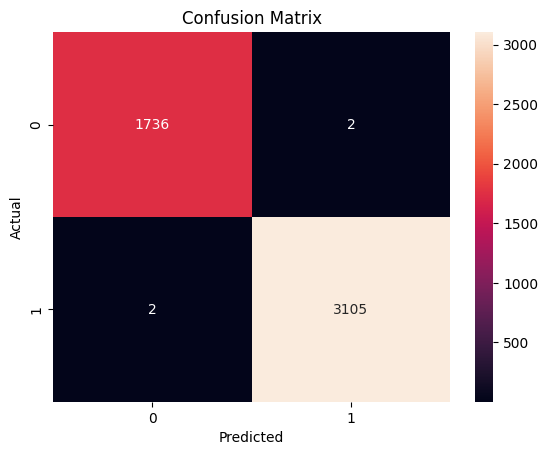

In [11]:
matrix = confusion_matrix(y_test, y_final_pred)

sns.heatmap(matrix, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Findings

<p align="justify">This analysis demonstrated the effectiveness of the K-Nearest Neighbors algorithm for gender classification based on vocal features.

<p align="justify">After preprocessing the data and scaling the features, an optimal 'k' value was determined through experimentation, resulting in the highest accuracy. The final model, trained with this optimal 'k', exhibited strong predictive performance, accurately classifying gender based on the provided vocal characteristics. The confusion matrix provided further insights into the model's performance, showcasing its ability to correctly distinguish between male and female voices with a high degree of precision.

<p align="justify">This study highlights the potential of machine learning techniques, particularly the K-Nearest Neighbors algorithm, for applications in gender identification and similar classification tasks using acoustic features. Overall, this analysis suggests that vocal features can be effectively utilized for automated gender classification with promising results.